<h2>1. Double (and more) Pendulum</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

<h2>(a):</h2>

Solve double pendulum using (11.37) and (11.38) in Taylor 11.4


$U(\phi_1,\phi_2)=(m_1+m_2) g L_1 (1-\cos{\phi_1})+m_2 g L_2 (1-\cos{\phi_2})$

$T = \frac{1}{2} (m_1+m_2) L_1^2 \dot{\phi_1^2}+m_2 L_1 L_2 \dot{\phi_1} \dot{\phi_2} \cos{(\phi_1 - \phi_2)}+\frac{1}{2} m_2 L_2^2 \dot{\phi_2^2}$

<h3>first impliment the pendulum code as a python class</h3>

I derived the kinematic equations and formulated them into the code

In [2]:
class double_Pendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
    double pendulums (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum
    g : float
        gravitational acceleration at the earth's surface
    mass1 : float
        mass of the first pendulum
    mass2 : float
        mass of the second pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vectors y1 and y2, 
        given time t and the corresponding values of y1 and y2.
    """

    def __init__(self,L1=1.,m1=1.,L2=1.,m2=1.,g=1.):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self,t,y):
        """
        This function returns the right-hand side of two diffeqs: 
        [dphi1_dt, d^2phi1_dt^2, dphi2_dt, d^2phi2_dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi_1(t), y[1] = dphi1/dt, y[2] = phi_2(t), and y[3]=dphi2/dt
            
        Returns
        -------

        """
        
        m1 = self.m1
        m2 = self.m2
        L1 = self.L1
        L2 = self.L2
        g = self.g     
        
        dy_dt = np.array(y)
        dy_dt[0] = y[1]
        dy_dt[1] = (m2*L1*y[1]*y[1]*np.sin(y[2] - y[0])*np.cos(y[2] - y[0]) + m2*g*np.sin(y[2])*np.cos(y[2] - y[0]) +
                    m2*L2*y[3]*y[3]*np.sin(y[2] - y[0]) - (m1 + m2)*g*np.sin(y[0]))/((m1 + m2)*L1 - m2*L1*np.cos(y[2] - y[0])*np.cos(y[2] - y[0]))        
        dy_dt[2] = y[3]
        dy_dt[3] = (-m2*L2*y[3]*y[3]*np.sin(y[2] - y[0])*np.cos(y[2] - y[0]) + (m1 + m2)*g*np.sin(y[0])*np.cos(y[2] - y[0]) -
                   (m1 + m2)*L1*y[1]*y[1]*np.sin(y[2] - y[0]) -
                   (m1 + m2)*g*np.sin(y[2]))/((L2/L1)*((m1 + m2)*L1 - m2*L1*np.cos(y[2] - y[0])*np.cos(y[2] - y[0])))
        
        return dy_dt
    
    def solve_ode(self,t_pts,phi0_1,phi0_1dot,phi0_2,phi0_2dot,abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi0_1,phi0_1dot,phi0_2,phi0_2dot] 
        solution = solve_ivp(self.dy_dt,(t_pts[0],t_pts[-1]),y,t_eval=t_pts,atol=abserr,rtol=relerr)        
        phi_1, phi_1_dot, phi_2, phi_2_dot = solution.y
        return phi_1, phi_1_dot, phi_2, phi_2_dot

<h3>Solve the first problem using the defined functions</h3>

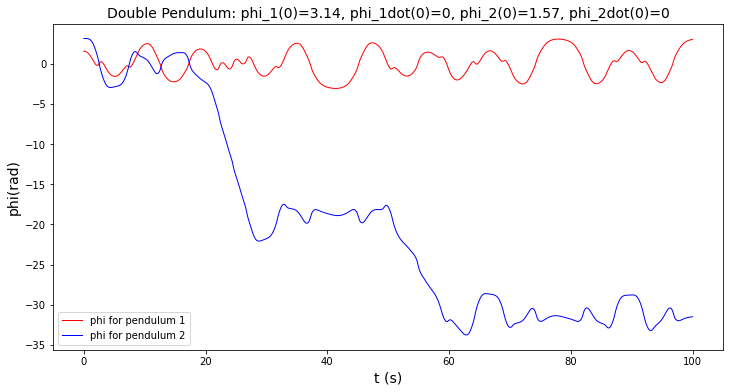

In [5]:
#first devide variables to small pieces
pendulum = double_Pendulum()
t_pts = np.arange(0, 100, 0.01)

#set up initial conditions
phi0_1=np.pi/2.
phi0_1dot=0.
phi0_2=np.pi
phi0_2dot=0.

#plug variables into function we defined
phi_1,phi_1dot,phi_2,phi_2dot = pendulum.solve_ode(t_pts,phi0_1=phi0_1,phi0_1dot=phi0_1dot,phi0_2=phi0_2,phi0_2dot=phi0_2dot)

#Now set up the plot
plt.figure(figsize=(12,6))
plt.xlabel('t (s)', fontsize=14)
plt.ylabel('phi(rad)', fontsize=14)
plt.title('Double Pendulum: phi_1(0)=3.14, phi_1dot(0)=0, phi_2(0)=1.57, phi_2dot(0)=0', fontsize=14)
plt.plot(t_pts, phi_1, linewidth=1.0, label='phi for pendulum 1',color = 'red')
plt.plot(t_pts, phi_2, linewidth=1.0, label='phi for pendulum 2',color = 'blue')
plt.legend()

<h2>(b):</h2>

show this system is chaotic for initial conditions

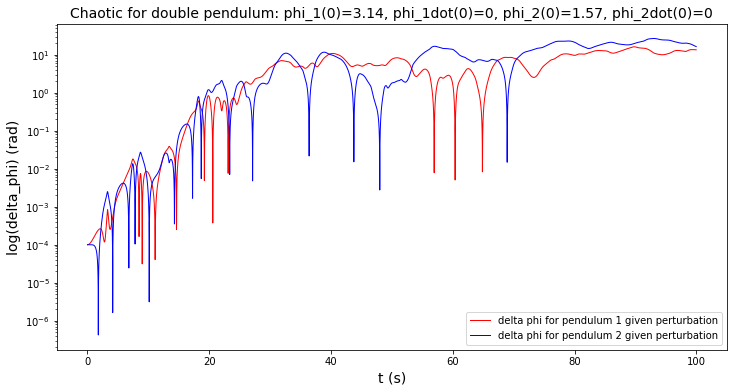

In [6]:
###the first step is similar to (a) but we need to find perturbations 
pendulum = double_Pendulum()

#obtain time variables
t_pts = np.arange(0, 100, 0.01)

#set initial conditions
phi0_1=np.pi
phi0_1dot_0=0.
phi0_2=np.pi/2.
phi0_2dot=0.

#through in some perturbations
phi0_1perturb = phi0_1 + 0.0001
phi0_2perturb = phi0_2 + 0.0001

#plug perturbed values and unperturbed values into functions we difined
phi_1,phi_1dot,phi_2,phi_2dot=pendulum.solve_ode(t_pts,phi0_1=phi0_1,phi0_1dot=phi0_1dot,phi0_2=phi0_2,phi0_2dot=phi0_2dot)
phi_1perturb,phi_1dotperturb,phi_2perturb,phi_2dotperturb=pendulum.solve_ode(t_pts,phi0_1=phi0_1perturb,phi0_1dot=phi0_1dot,phi0_2=phi0_2perturb,phi0_2dot=phi0_2dot)

#final the difference between these two values - this will be the variables used in the plot below
delta1 = np.abs(phi_1perturb - phi_1)
delta2 = np.abs(phi_2perturb - phi_2)

#Now set up the plot
plt.figure(figsize=(12,6))
plt.xlabel(r't (s)', fontsize=14)
plt.ylabel(r'log(delta_phi) (rad)', fontsize=14)
plt.title('Chaotic for double pendulum: phi_1(0)=3.14, phi_1dot(0)=0, phi_2(0)=1.57, phi_2dot(0)=0', fontsize=14)
plt.semilogy(t_pts, delta1, linewidth=1.0, label='delta phi for pendulum 1 given perturbation',color = 'red')
plt.semilogy(t_pts, delta2, linewidth=1.0, label='delta phi for pendulum 2 given perturbation',color = 'blue')
plt.legend()

<h2>(c):</h2>

add Markdown/LaTex documentation

Please see my documentations above